In [6]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [7]:
outdir = '/data/SO2/sio-kramosmusalem/11_no_parallel_flow_obcs_noSVB_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [8]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

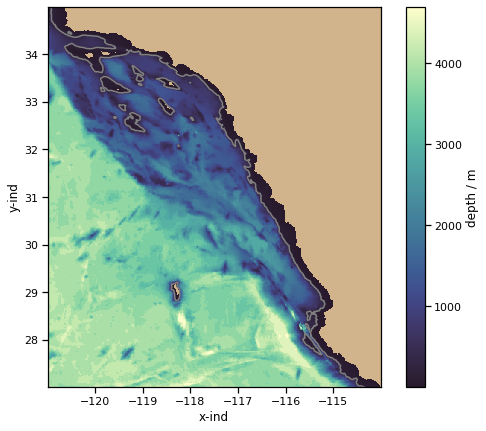

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255+128
lat_ind1 = 70
lat_ind2 = 120
lon_inds = [280+128,200+128,200+128,160+128,140+128,130+128,100+128,80+128]
lat_inds = [lat_ind1,lat_ind1, 110, lat_ind2+50,
            lat_ind2+100, lat_ind2+150, lat_ind2+200, lat_ind2+250]

cb.set_label('depth / m')
ax.set_xlabel('x-ind')
ax.set_ylabel('y-ind')

ax.set_aspect(1)

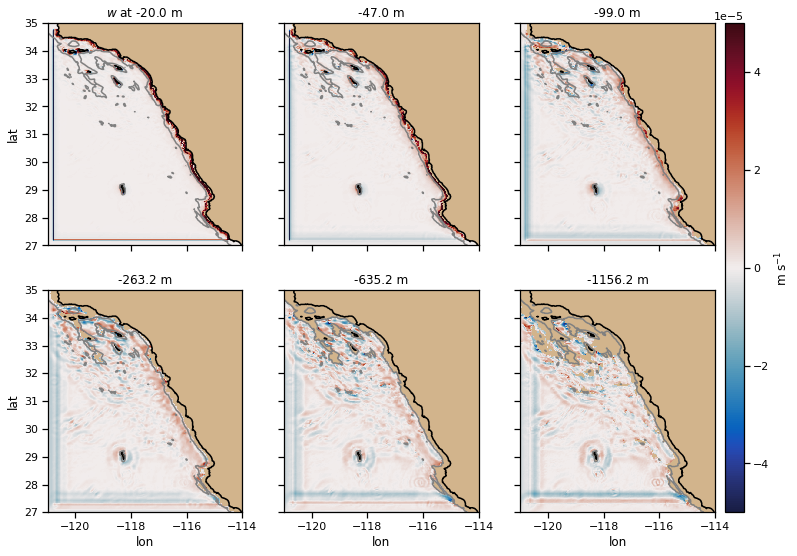

In [10]:
sns.set_context('notebook')
zz = 8
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600

W1 = ds['WVEL'][-1,zz,:,:]
W2 = ds['WVEL'][-1,zz2,:,:]
W3 = ds['WVEL'][-1,zz3,:,:]
W4 = ds['WVEL'][-1,zz4,:,:]
W5 = ds['WVEL'][-1,zz5,:,:]
W6 = ds['WVEL'][-1,zz6,:,:]

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(W1,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance, vmin=-5E-5, vmax=5E-5)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(W2,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance, vmin=-5E-5, vmax=5E-5)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(W3,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance, vmin=-5E-5, vmax=5E-5)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(W4,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance, vmin=-5E-5, vmax=5E-5)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(W5,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance, vmin=-5E-5, vmax=5E-5)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(W6,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,vmin=-5E-5, vmax=5E-5)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-5E-5, vmax=5E-5)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

ax3.set_xlabel('lon')
ax4.set_xlabel('lon')
ax5.set_xlabel('lon')
ax0.set_ylabel('lat')
ax3.set_ylabel('lat')

ax0.set_title(r'$w$ at %1.1f m'%(Zl[zz]))
ax1.set_title('%1.1f m'%(Zl[zz2]))
ax2.set_title('%1.1f m'%(Zl[zz3]))
ax3.set_title('%1.1f m'%(Zl[zz4]))
ax4.set_title('%1.1f m'%(Zl[zz5]))
ax5.set_title('%1.1f m'%(Zl[zz6]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
    ax.set_ylim(27,35)
    ax.set_xlim(-121,-114)
#plt.tight_layout()

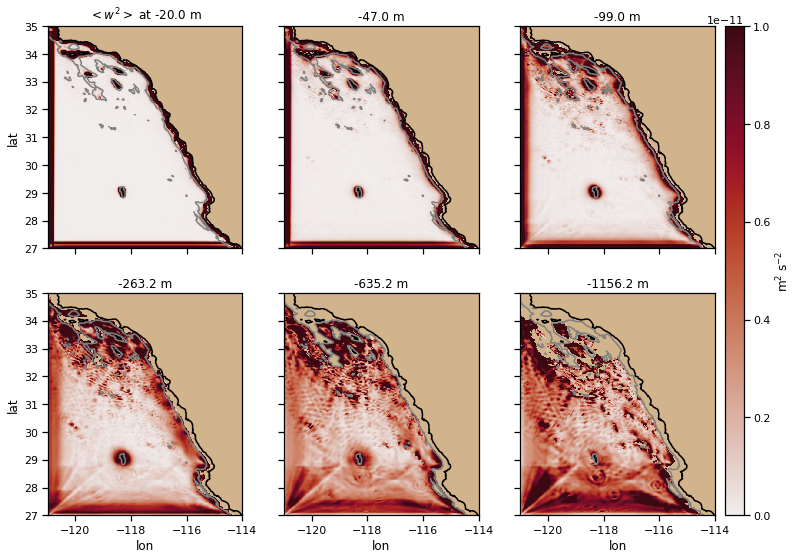

In [6]:
sns.set_context('notebook')
zz = 8
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600

W1 = ds['WVEL'][tini:,zz,:,:]
W2 = ds['WVEL'][tini:,zz2,:,:]
W3 = ds['WVEL'][tini:,zz3,:,:]
W4 = ds['WVEL'][tini:,zz4,:,:]
W5 = ds['WVEL'][tini:,zz5,:,:]
W6 = ds['WVEL'][tini:,zz6,:,:]

Var1 = (np.sum(W1*W1, axis=0)*(dt))/(time[-1]-time[tini])
Var2 = (np.sum(W2*W2, axis=0)*(dt))/(time[-1]-time[tini])
Var3 = (np.sum(W3*W3, axis=0)*(dt))/(time[-1]-time[tini])
Var4 = (np.sum(W4*W4, axis=0)*(dt))/(time[-1]-time[tini])
Var5 = (np.sum(W5*W5, axis=0)*(dt))/(time[-1]-time[tini])
Var6 = (np.sum(W6*W6, axis=0)*(dt))/(time[-1]-time[tini])

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(Var1,mask=mask[zz,:,:]),
                   cmap=cmo.cm.amp, vmin=0, vmax=1E-11)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(Var2,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.amp, vmin=0, vmax=1E-11)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(Var3,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.amp, vmin=0, vmax=1E-11)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(Var4,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.amp, vmin=0, vmax=1E-11)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(Var5,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.amp, vmin=0, vmax=1E-11)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(Var6,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.amp,vmin=0, vmax=1E-11)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=0, vmax=1E-11)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.amp),
                  cax=cbar_ax, orientation='vertical',label='m$^2$ s$^{-2}$')

ax3.set_xlabel('lon')
ax4.set_xlabel('lon')
ax5.set_xlabel('lon')
ax0.set_ylabel('lat')
ax3.set_ylabel('lat')

ax0.set_title(r'$<{w^2}>$ at %1.1f m'%(Zl[zz]))
ax1.set_title('%1.1f m'%(Zl[zz2]))
ax2.set_title('%1.1f m'%(Zl[zz3]))
ax3.set_title('%1.1f m'%(Zl[zz4]))
ax4.set_title('%1.1f m'%(Zl[zz5]))
ax5.set_title('%1.1f m'%(Zl[zz6]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
    ax.set_ylim(27,35)
    ax.set_xlim(-121,-114)
#plt.tight_layout()

### Mean w

In [ ]:
sns.set_context('talk')
tini = 24
colors = ['red','blue','green','orange','purple','magenta']
fig1, (ax1) = plt.subplots(1,1, figsize=(6,5), sharey=True,sharex=True)
ZZs = [15, 25, 43, 60, 65, 70]
for zz, col in zip(ZZs, colors):
    w1 = ds['WVEL'][:,zz,lat_inds[0],lon_inds[0]]
    w2 = ds['WVEL'][:,zz,lat_inds[1],lon_inds[1]]
    w3 = ds['WVEL'][:,zz,lat_inds[2],lon_inds[2]]
    w4 = ds['WVEL'][:,zz,lat_inds[3],lon_inds[3]]
    w5 = ds['WVEL'][:,zz,lat_inds[4],lon_inds[4]]
    w6 = ds['WVEL'][:,zz,lat_inds[5],lon_inds[5]]
    w7 = ds['WVEL'][:,zz,lat_inds[6],lon_inds[6]]
    w8 = ds['WVEL'][:,zz,lat_inds[7],lon_inds[7]]
   
    ws = [w2,w3,w4,w5,w6,w7,w8]
    for w,ind,ii in zip(ws, lat_inds[1:], range(len(ws))):
        ax1.semilogy(lat[ind],(np.sum(w[tini:]*(600)))/(time[-1]-time[tini]),
                     'o',color=col)

legend_elements = [Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[0]]]),
                          markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[1]]]),
                          markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[2]]]),
                          markerfacecolor='green', markersize=15),
                   Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[3]]]),
                          markerfacecolor='orange', markersize=15), 
                   Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[4]]]),
                          markerfacecolor='purple', markersize=15), 
                   Line2D([0], [0], marker='o', color='w',label='%1.1f m depth' %(Zl[Zind[ZZs[5]]]),
                          markerfacecolor='magenta', markersize=15), 
                  ]
ax1.set_ylabel('$<w>$ / m s$^{-1}$')
ax1.set_xlabel('latitude')
ax1.set_aspect(1)
ax1.legend(handles=legend_elements,bbox_to_anchor=(1.1,1))
plt.show()  